In [77]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')


from pandas.plotting import scatter_matrix

#from cleaning import cleaning_df

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, log_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier



from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import log_loss, make_scorer




from sklearn.pipeline import Pipeline
from regression_tools.dftransformers import (
    ColumnSelector, Identity,
    FeatureUnion, MapFeature,
    StandardScaler)





# Custom Cross Validation Function

In [78]:
def crossVal(estimators, X_train, y_train, k=5):
    kf = KFold(n_splits = k, shuffle=True)
    splits = kf.split(X_train, y_train)
    scores = []
    
    for train_index, test_index in splits:
        score = []
        for estimator in estimators:
            X_train_fold, X_test_fold = X_train.values[train_index], X_train.values[test_index]
            y_train_fold, y_test_fold = y_train.values[train_index], y_train.values[test_index]
            estimator.fit(X_train_fold, y_train_fold)
            train_predicted = estimator.predict(X_train_fold)
            test_predicted = estimator.predict(X_test_fold)
            score.append(accuracy_score(y_test_fold, test_predicted))            
        scores.append(score)
    return np.array(scores)

# Load Complete Data Frame & Train Test Split

In [146]:
matchup_data = pd.read_csv("data/matchup_data.csv")

X = matchup_data[['diff_assists', 'diff_denies', 'diff_first_blood', 'diff_gpm', 'diff_healing', 'diff_hero_damage', 'diff_kills', 'diff_last_hits', 'diff_match_duration', 'diff_total_levels', 'diff_tower_damage', 'diff_xpm']]
y = matchup_data.radiant_winner

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)


# Logistic Regression


In [147]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

train_predicted = lr.predict(X_train)
test_predicted = lr.predict(X_test)

lr_Train = accuracy_score(y_train, train_predicted)
lr_Test = accuracy_score(y_test, test_predicted)
print(lr_Train, lr_Test)



0.7254901960784313 0.6111111111111112


# K Nearest Neighbor Classifier

In [148]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train, y_train)

train_predicted = knn.predict(X_train)
test_predicted = knn.predict(X_test)

knn_Train = accuracy_score(y_train, train_predicted)
knn_Test = accuracy_score(y_test, test_predicted)
print(knn_Train, knn_Test)


0.4823529411764706 0.5238095238095238


[0.5851551956815115, 0.5748313090418353, 0.5802294197031038, 0.5960188933873144, 0.5854251012145749, 0.5724696356275304, 0.582995951417004, 0.5725371120107962, 0.5959514170040485, 0.5881916329284751, 0.6065452091767881, 0.5960188933873145, 0.6221997300944669, 0.6141700404858299, 0.6404858299595141, 0.6456815114709851, 0.6327260458839407, 0.6248313090418354, 0.6327260458839407, 0.6116734143049932, 0.6222672064777328, 0.6089743589743589, 0.608974358974359, 0.6010796221322537, 0.6064102564102565, 0.6064102564102564, 0.6117408906882591, 0.6195006747638326, 0.6300944669365723, 0.6352901484480433]


Text(0,0.5,'Cross-Validated Accuracy')

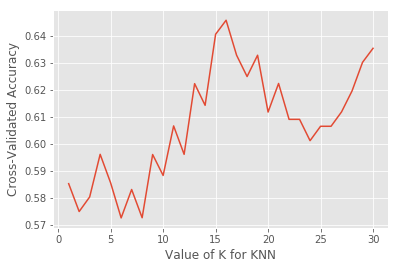

In [149]:
# Find Best Value for K

k_range = list(range(1, 31))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_data, y_data, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Random Forest Classifier

In [204]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

train_predicted = rf.predict(X_train)
test_predicted = rf.predict(X_test)

rf_Train = accuracy_score(y_train, train_predicted)
rf_Test = accuracy_score(y_test, test_predicted)
print(rf_Train, rf_Test)

0.9058823529411765 0.6190476190476191


# Gradient Boosting Classifier

In [205]:
gdbc = GradientBoostingClassifier()
gdbc.fit(X_train, y_train)

train_predicted = gdbc.predict(X_train)
test_predicted = gdbc.predict(X_test)

gdbc_Train = accuracy_score(y_train, train_predicted)
gdbc_Test = accuracy_score(y_test, test_predicted)
print(gdbc_Train, gdbc_Test)



0.9098039215686274 0.6428571428571429


# Cross Validation

In [152]:
estimators = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors=16)]
scores = crossVal(estimators, X_train, y_train, k=10)
scores

array([[0.69230769, 0.76923077, 0.76923077, 0.61538462],
       [0.73076923, 0.61538462, 0.61538462, 0.69230769],
       [0.65384615, 0.69230769, 0.65384615, 0.61538462],
       [0.73076923, 0.73076923, 0.80769231, 0.65384615],
       [0.61538462, 0.65384615, 0.80769231, 0.57692308],
       [0.64      , 0.6       , 0.48      , 0.6       ],
       [0.56      , 0.56      , 0.6       , 0.56      ],
       [0.76      , 0.56      , 0.6       , 0.72      ],
       [0.68      , 0.6       , 0.64      , 0.68      ],
       [0.64      , 0.6       , 0.64      , 0.68      ]])

In [153]:
np.mean(scores, axis=0)

array([0.67030769, 0.63815385, 0.66138462, 0.63938462])

# Grid Search


In [203]:
# Grid Search for best hyperparameters (Random Forest)
random_forest_grid = {'max_depth': [3,4,5,None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_leaf': [1, 2, 4, 8],
                       'n_estimators': [10, 20, 40, 80, 100]}

rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='accuracy')

rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    3.4s


best parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 20}


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   11.4s finished


In [202]:
# Grid Search for best hyperparameters (GradientBoostRegressor)
gradient_boost_grid = {'max_depth': [3,4,5,None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_leaf': [1, 2, 4, 8],
                       'n_estimators': [10, 20, 40, 80,100]}

gdbc_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                             gradient_boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='accuracy')

gdbc_gridsearch.fit(X_train, y_train)

print("best parameters:", gdbc_gridsearch.best_params_)

best_gdbc_model = gdbc_gridsearch.best_estimator_

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    2.9s


best parameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 20}


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    7.4s finished


# Optimized Random Forest and Boosting Models

In [206]:
best_rf = RandomForestClassifier(max_depth=3, max_features='sqrt',
                                min_samples_split=2, min_samples_leaf=8,
                                bootstrap=True, n_estimators=20,
                                n_jobs=-1, random_state=1)

best_rf.fit(X_train, y_train)

train_predicted = best_rf.predict(X_train)
test_predicted = best_rf.predict(X_test)
best_rf_train, best_rf_test =accuracy_score(y_train, train_predicted), accuracy_score(y_test, test_predicted)
print(f"Model: Best RandomForestClassifier\tTestCV\tAccuracy_train:{best_rf_train}\tAccuracy_test:{best_rf_test}")

Model: Best RandomForestClassifier	TestCV	Accuracy_train:0.7647058823529411	Accuracy_test:0.6507936507936508


In [208]:
# The best Gradient Boosting Classifier improves slightly upon the default RF used above.
best_gdbc = GradientBoostingClassifier(max_depth=3, max_features='sqrt',
                                       min_samples_split=2,
                                        min_samples_leaf=4,
                                        n_estimators=20,
                                        random_state=1)
best_gdbc.fit(X_train, y_train)

# Call predict to get the predicted values for training and test set
train_predicted = best_gdbc.predict(X_train)
test_predicted = best_gdbc.predict(X_test)

# log-loss score calcs for training and test
best_gdbc_train = accuracy_score(y_train, train_predicted)
best_gdbc_test = accuracy_score(y_test, test_predicted)
print(f"Model: Best GradientBoostingClassifier\tTestCV\tAccuracy_train:{best_gdbc_train}\tAccuracy_test:{best_gdbc_test}")

Model: Best GradientBoostingClassifier	TestCV	Accuracy_train:0.8313725490196079	Accuracy_test:0.626984126984127


Initial RF Score:    0.6190476190476191

Optimized RF Score:  0.6507936507936508

Initial GDBC Score:  0.6428571428571429

Optimized GDBC Score:0.626984126984127



# Feature Importance


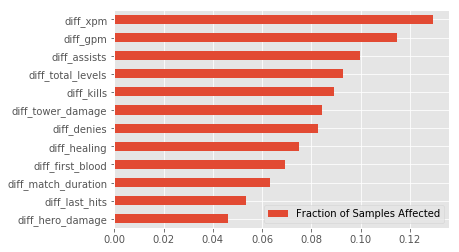

In [209]:
# Feature Importances(RF)
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=X_train.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

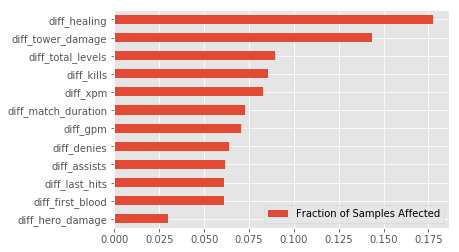

In [210]:
# Feature Importances(GB)
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : gdbc.feature_importances_},
                           index=X_train.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

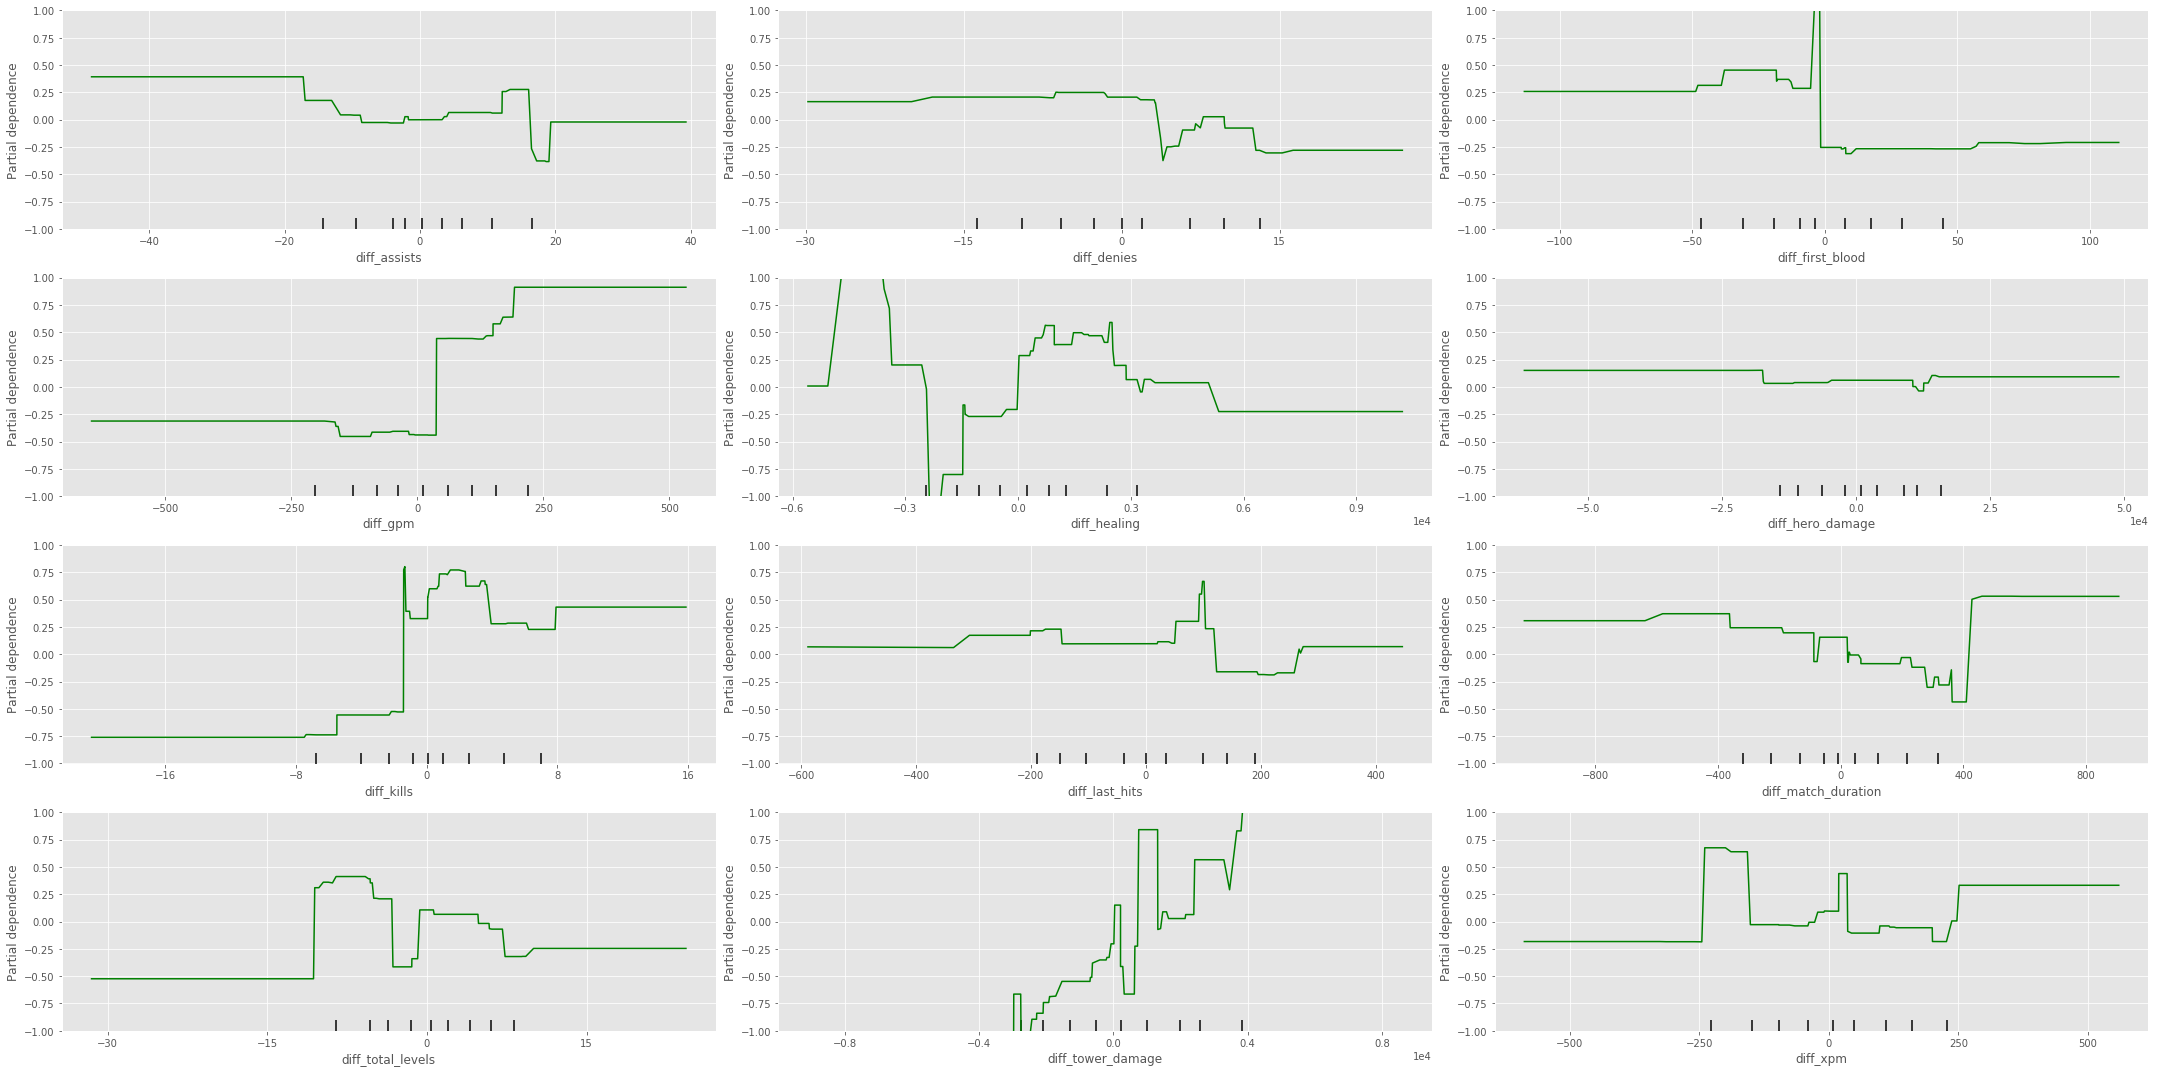

In [225]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.ensemble.partial_dependence import plot_partial_dependence

var_names = X_train.columns
features = list(range(X_train.shape[1]))
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11]

fig, axs = plot_partial_dependence(gdbc, X_train, features,
                                       feature_names=var_names,
                                       n_jobs=3, grid_resolution=250, figsize=(30, 15))
for ax in axs:
    ax.set_ylim([-1, 1])
fig.tight_layout()